<a href="https://colab.research.google.com/github/ArindamSarma/CSE-264/blob/master/CSE_264_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1:**

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive
from google.colab.patches import cv2_imshow
from PIL import Image
import math
from sklearn.linear_model import LinearRegression

## Loading Data


In [140]:
# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Location of dataset on my Google Drive
image_path = "drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 1"

image_list = sorted([os.path.join(image_path, file) for file in os.listdir(image_path)])


In [66]:
print(image_list)

['drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 1/IMG_20200510_125110.jpg', 'drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 1/IMG_20200510_125121.jpg', 'drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 1/IMG_20200510_125131.jpg', 'drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 1/IMG_20200510_125140.jpg', 'drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 1/IMG_20200510_125148.jpg', 'drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 1/IMG_20200510_125154.jpg', 'drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 1/IMG_20200510_125201.jpg', 'drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 1/IMG_20200510_125208.jpg', 'drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 1/IMG_20200510_125247.jpg', 'drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 1/IMG_20200510_125311.jpg']


## Cropping and Renaming Images

In [0]:
exp_times = [1/300, 1/200, 1/100, 1/90, 1/80, 1/70, 1/60, 1/50, 1/35, 1/15]

In [0]:
for index, file in enumerate(image_list):
  img = cv2.imread(file)
  name = str(index) + ".jpg"
  cropped_img = img[2000:2500,1500:2000].copy()
  file_name = os.path.join(image_path, name)
  cv2.imwrite(file_name, cropped_img)

In [69]:
image_list = sorted([os.path.join(image_path, file) for file in os.listdir(image_path) if not file.startswith("I")])
print(image_list)

['drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 1/0.jpg', 'drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 1/1.jpg', 'drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 1/2.jpg', 'drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 1/3.jpg', 'drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 1/4.jpg', 'drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 1/5.jpg', 'drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 1/6.jpg', 'drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 1/7.jpg', 'drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 1/8.jpg', 'drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 1/9.jpg']


## Calculating Average Color Values

In [78]:
avgs = []

for file in image_list:
  img = cv2.imread(file)
  rows,cols,_ = img.shape
  total = rows*cols
  B,G,R = 0,0,0
  for i in range(rows):
    for j in range(cols):
      B += img[i, j, 0]
      G += img[i, j, 1]
      R += img[i, j, 2]
  B_avg, G_avg, R_avg = B/total, G/total, R/total
  avgs.append((B_avg, G_avg, R_avg))


print(avgs)

[(42.327984, 29.568256, 23.446792), (58.2399, 42.586836, 33.72778), (92.238816, 74.025612, 59.789712), (98.725828, 80.332212, 63.761912), (105.200792, 87.266736, 70.384096), (116.975864, 96.358416, 78.054948), (129.491972, 108.738996, 88.987376), (145.376804, 123.638952, 101.718976), (162.417108, 134.187176, 108.022816), (226.62192, 203.294176, 177.092936)]


## Plotting Average Colors vs Exposure Time

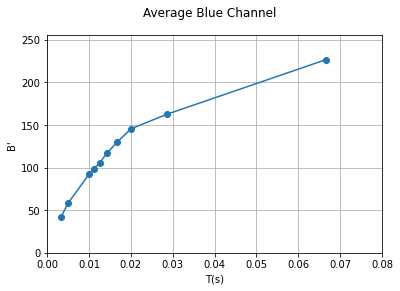

In [94]:
plt.plot(exp_times, [B for (B,G,R) in avgs], marker='o')
plt.xlabel('T(s)')
plt.ylabel('B\'')
plt.suptitle('Average Blue Channel')
plt.axis([0, 0.08, 0, 255])
plt.grid(True)
plt.show()

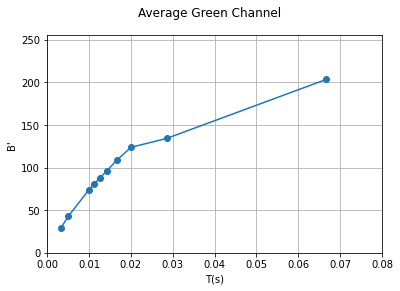

In [95]:
plt.plot(exp_times, [G for (B,G,R) in avgs], marker='o')
plt.xlabel('T(s)')
plt.ylabel('B\'')
plt.suptitle('Average Green Channel')
plt.axis([0, 0.08, 0, 255])
plt.grid(True)
plt.show()

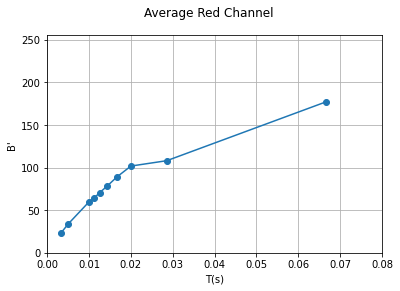

In [96]:
plt.plot(exp_times, [R for (B,G,R) in avgs], marker='o')
plt.xlabel('T(s)')
plt.ylabel('B\'')
plt.suptitle('Average Red Channel')
plt.axis([0, 0.08, 0, 255])
plt.grid(True)
plt.show()

## Plotting Log Color Values vs Log Exposure Time

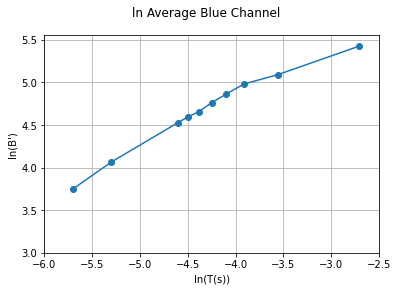

In [107]:
plt.plot([math.log(time) for time in exp_times], [math.log(B) for (B,G,R) in avgs], marker='o')
plt.xlabel('ln(T(s))')
plt.ylabel('ln(B\')')
plt.suptitle('ln Average Blue Channel')
plt.axis([-6, -2.5, 3.0, 5.5])
plt.grid(True)
plt.show()

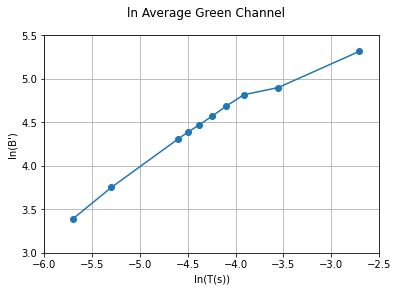

In [108]:
plt.plot([math.log(time) for time in exp_times], [math.log(G) for (B,G,R) in avgs], marker='o')
plt.xlabel('ln(T(s))')
plt.ylabel('ln(B\')')
plt.suptitle('ln Average Green Channel')
plt.axis([-6, -2.5, 3.0, 5.5])
plt.grid(True)
plt.show()

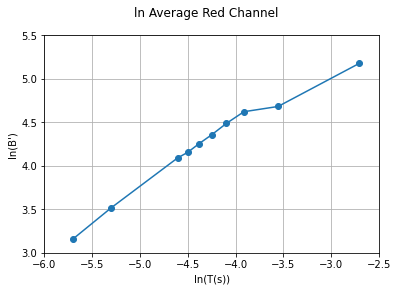

In [109]:
plt.plot([math.log(time) for time in exp_times], [math.log(R) for (B,G,R) in avgs], marker='o')
plt.xlabel('ln(T(s))')
plt.ylabel('ln(B\')')
plt.suptitle('ln Average Red Channel')
plt.axis([-6, -2.5, 3.0, 5.5])
plt.grid(True)
plt.show()

## Linear Regression

In [0]:
#Linear Regression on Blue Channel
x = np.array([math.log(time) for time in exp_times]).reshape((-1, 1))
y = np.array([math.log(B) for (B,G,R) in avgs])
model = LinearRegression().fit(x, y)
#intercept
b_blue = model.intercept_
#slope
a_blue = model.coef_

g_blue = 1/a_blue

In [0]:
#Linear Regression on Green Channel
x = np.array([math.log(time) for time in exp_times]).reshape((-1, 1))
y = np.array([math.log(G) for (B,G,R) in avgs])
model = LinearRegression().fit(x, y)
#intercept
b_green = model.intercept_
#slope
a_green = model.coef_

g_green = 1/a_green

In [0]:
#Linear Regression on Red Channel
x = np.array([math.log(time) for time in exp_times]).reshape((-1, 1))
y = np.array([math.log(R) for (B,G,R) in avgs])
model = LinearRegression().fit(x, y)
#intercept
b_red = model.intercept_
#slope
a_red = model.coef_

g_red = 1/a_red

In [0]:
linearized_avgs = []
for time in exp_times:
  linear_B = b_blue + (a_blue * math.log(time))
  linear_G = b_green + (a_green * math.log(time))
  linear_R = b_red + (a_red * math.log(time))
  linearized_avgs.append((linear_B, linear_G, linear_R))

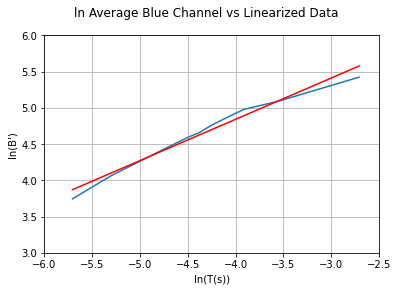

In [120]:
log_times = [math.log(time) for time in exp_times]
plt.plot(log_times, [math.log(B) for (B,G,R) in avgs], log_times, [lin_B for (lin_B,_,_) in linearized_avgs], 'r')
plt.xlabel('ln(T(s))')
plt.ylabel('ln(B\')')
plt.suptitle('ln Average Blue Channel vs Linearized Data')
plt.axis([-6, -2.5, 3.0, 6])
plt.grid(True)
plt.show()

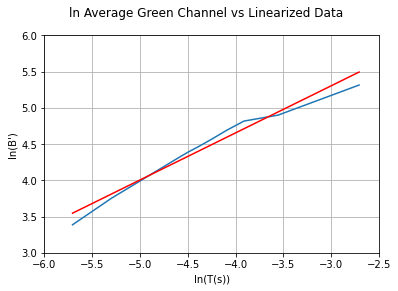

In [121]:
log_times = [math.log(time) for time in exp_times]
plt.plot(log_times, [math.log(G) for (B,G,R) in avgs], log_times, [lin_G for (_,lin_G,_) in linearized_avgs], 'r')
plt.xlabel('ln(T(s))')
plt.ylabel('ln(B\')')
plt.suptitle('ln Average Green Channel vs Linearized Data')
plt.axis([-6, -2.5, 3.0, 6])
plt.grid(True)
plt.show()

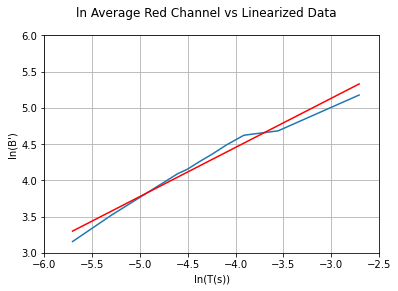

In [122]:
log_times = [math.log(time) for time in exp_times]
plt.plot(log_times, [math.log(R) for (B,G,R) in avgs], log_times, [lin_R for (_,_,lin_R) in linearized_avgs], 'r')
plt.xlabel('ln(T(s))')
plt.ylabel('ln(B\')')
plt.suptitle('ln Average Red Channel vs Linearized Data')
plt.axis([-6, -2.5, 3.0, 6])
plt.grid(True)
plt.show()

## Plotting **B' vs T** and **B'<sup>g</sup> vs T**

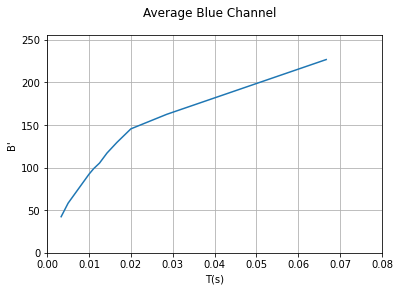

In [134]:
plt.plot(exp_times, [B for (B,G,R) in avgs])
plt.xlabel('T(s)')
plt.ylabel('B\'')
plt.suptitle('Average Blue Channel')
plt.axis([0, 0.08, 0, 255])
plt.grid(True)
plt.show()

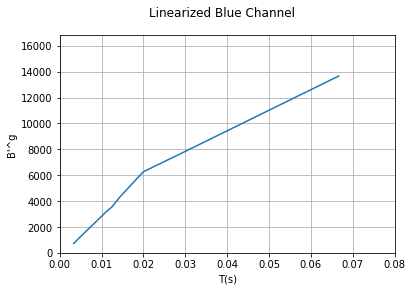

In [135]:
plt.plot(exp_times, [math.pow(B,g_blue) for (B,G,R) in avgs])
plt.xlabel('T(s)')
plt.ylabel('B\'^g')
plt.suptitle('Linearized Blue Channel')
plt.axis([0, 0.08, 0, math.pow(255, g_blue)])
plt.grid(True)
plt.show()

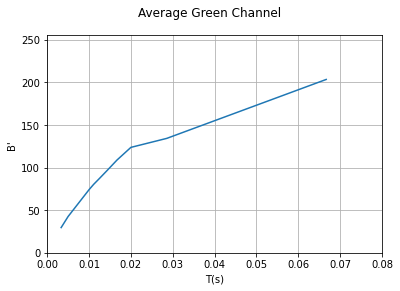

In [136]:
plt.plot(exp_times, [G for (B,G,R) in avgs])
plt.xlabel('T(s)')
plt.ylabel('B\'')
plt.suptitle('Average Green Channel')
plt.axis([0, 0.08, 0, 255])
plt.grid(True)
plt.show()

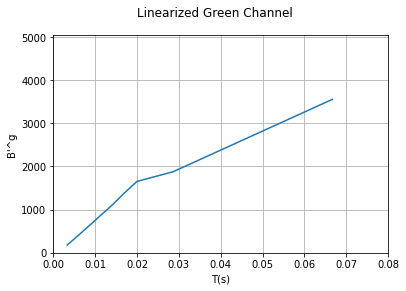

In [137]:
plt.plot(exp_times, [math.pow(G,g_green) for (B,G,R) in avgs])
plt.xlabel('T(s)')
plt.ylabel('B\'^g')
plt.suptitle('Linearized Green Channel')
plt.axis([0, 0.08, 0, math.pow(255, g_green)])
plt.grid(True)
plt.show()

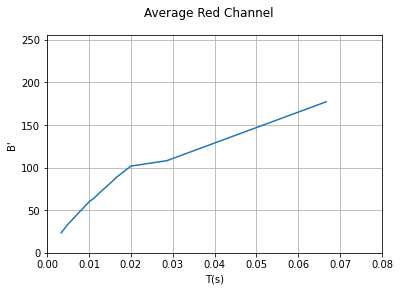

In [138]:
plt.plot(exp_times, [R for (B,G,R) in avgs])
plt.xlabel('T(s)')
plt.ylabel('B\'')
plt.suptitle('Average Red Channel')
plt.axis([0, 0.08, 0, 255])
plt.grid(True)
plt.show()

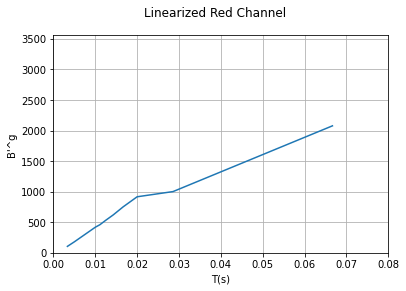

In [139]:
plt.plot(exp_times, [math.pow(R,g_red) for (B,G,R) in avgs])
plt.xlabel('T(s)')
plt.ylabel('B\'^g')
plt.suptitle('Linearized Red Channel')
plt.axis([0, 0.08, 0, math.pow(255, g_red)])
plt.grid(True)
plt.show()

# Part 2

## Loading Data

Illuminant 1: Gain = 55, Exposure Time = 1/10000s\
Illuminant 2: Gain = 100, Exposure Time = 1/50s\
Illuminant 3: Gain = 200, Exposure Time = 1/20s

Colors: White, Red, Purple, Yellow/Cream



In [0]:
# Location of dataset on my Google Drive
image_path = "drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 2"

image_list = sorted([os.path.join(image_path, file) for file in os.listdir(image_path)])

In [197]:
for num, name in enumerate(image_list):
  print(num, name)

0 drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 2/1_1_0.jpg
1 drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 2/1_1_1.jpg
2 drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 2/1_2_0.jpg
3 drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 2/1_2_1.jpg
4 drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 2/1_3_0.jpg
5 drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 2/1_3_1.jpg
6 drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 2/1_4_0.jpg
7 drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 2/1_4_1.jpg
8 drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 2/1_5_0.jpg
9 drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 2/1_5_1.jpg
10 drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 2/2_1_0.jpg
11 drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 2/2_1_1.jpg
12 drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 2/2_2_0.jpg
13 drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 2/2_2_1.jpg
14 drive/My Drive/Colab Notebooks/CSE 264 Pr

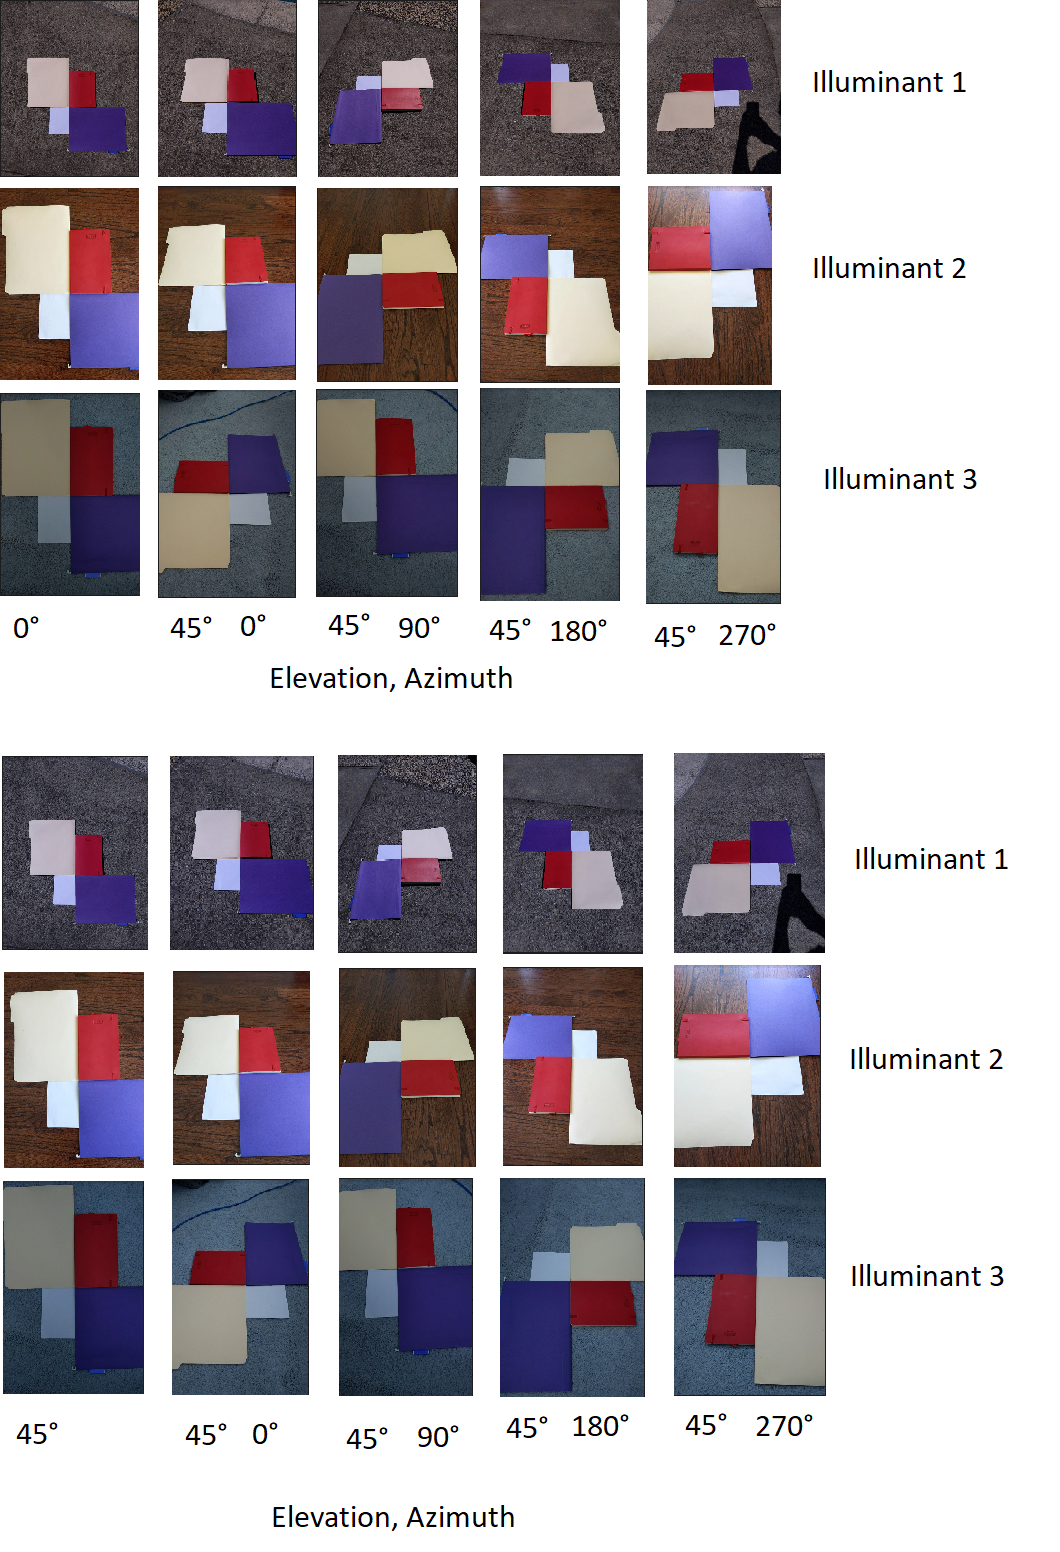

In [362]:
image_table_path = "drive/My Drive/Colab Notebooks/CSE 264 Project 1 Part 2 Image Table.png"
img = cv2.imread(image_table_path)
cv2_imshow(img)

## Calculating Cropped Image Sections

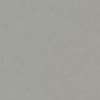

In [354]:
im_num = 29
x,y = 2200,1800
img = cv2.imread(image_list[im_num])
cropped_img = img[x:x+100,y:y+100]
cv2_imshow(cropped_img)

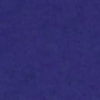

In [355]:
x,y = 1500,1000
img = cv2.imread(image_list[im_num])
cropped_img = img[x:x+100,y:y+100]
cv2_imshow(cropped_img)

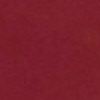

In [356]:
x,y = 2200,1000
img = cv2.imread(image_list[im_num])
cropped_img = img[x:x+100,y:y+100]
cv2_imshow(cropped_img)

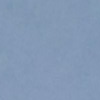

In [357]:
x,y = 1400,1800
img = cv2.imread(image_list[im_num])
cropped_img = img[x:x+100,y:y+100]
cv2_imshow(cropped_img)

## Setting up Variables for Crop Values

In [0]:
crop_1_1_0_w, crop_1_1_0_r, crop_1_1_0_p, crop_1_1_0_y = (2600,1200),(2200,1600),(2600,1600),(2200,1200)
crop_1_1_1_w, crop_1_1_1_r, crop_1_1_1_p, crop_1_1_1_y = (2600,1200),(2200,1600),(2600,1600),(2200,1200)
crop_1_2_0_w, crop_1_2_0_r, crop_1_2_0_p, crop_1_2_0_y = (2600,1200),(2200,1600),(2600,1600),(2200,1200)
crop_1_2_1_w, crop_1_2_1_r, crop_1_2_1_p, crop_1_2_1_y = (2200,1400),(2000,1600),(2200,1600),(2000,1400)
crop_1_3_0_w, crop_1_3_0_r, crop_1_3_0_p, crop_1_3_0_y = (1800,1200),(2200,1600),(2200,1200),(1800,1400)
crop_1_3_1_w, crop_1_3_1_r, crop_1_3_1_p, crop_1_3_1_y = (1900,1200),(2200,1600),(2200,1200),(1800,1400)
crop_1_4_0_w, crop_1_4_0_r, crop_1_4_0_p, crop_1_4_0_y = (1800,1800),(2200,1200),(1800,1400),(2200,1600)
crop_1_4_1_w, crop_1_4_1_r, crop_1_4_1_p, crop_1_4_1_y = (1800,1800),(2200,1200),(1800,1400),(2200,1600)
crop_1_5_0_w, crop_1_5_0_r, crop_1_5_0_p, crop_1_5_0_y = (2400,1600),(2200,1200),(2200,1600),(2400,1400)
crop_1_5_1_w, crop_1_6_1_r, crop_1_5_1_p, crop_1_6_1_y = (2600,1600),(2200,1200),(2200,1600),(2600,1400)

crop_2_1_0_w, crop_2_1_0_r, crop_2_1_0_p, crop_2_1_0_y = (2000,2400),(1400,1200),(1400,2400),(2200,1600)
crop_2_1_1_w, crop_2_1_1_r, crop_2_1_1_p, crop_2_1_1_y = (2000,2400),(1400,1200),(1400,2400),(2200,1600)
crop_2_2_0_w, crop_2_2_0_r, crop_2_2_0_p, crop_2_2_0_y = (2200,1400),(1400,1600),(2200,1600),(1400,1200)
crop_2_2_1_w, crop_2_2_1_r, crop_2_2_1_p, crop_2_2_1_y = (2200,1400),(1400,1600),(2200,1600),(1400,1200)
crop_2_3_0_w, crop_2_3_0_r, crop_2_3_0_p, crop_2_3_0_y = (1400,1200),(2200,1600),(2200,1200),(1400,1600)
crop_2_3_1_w, crop_2_3_1_r, crop_2_3_1_p, crop_2_3_1_y = (1500,1200),(2200,1600),(2200,1200),(1400,1600)
crop_2_4_0_w, crop_2_4_0_r, crop_2_4_0_p, crop_2_4_0_y = (1400,1600),(2200,1200),(1500,1200),(2200,1600)
crop_2_4_1_w, crop_2_4_1_r, crop_2_4_1_p, crop_2_4_1_y = (1400,1600),(2200,1200),(1500,1200),(2200,1600)
crop_2_5_0_w, crop_2_5_0_r, crop_2_5_0_p, crop_2_5_0_y = (2200,1600),(1500,1200),(1400,1600),(2200,1200)
crop_2_5_1_w, crop_2_6_1_r, crop_2_5_1_p, crop_2_6_1_y = (2200,1600),(1500,1200),(1400,1600),(2200,1200)

crop_3_1_0_w, crop_3_1_0_r, crop_3_1_0_p, crop_3_1_0_y = (2200,1200),(1400,1600),(2200,1600),(1500,1200)
crop_3_1_1_w, crop_3_1_1_r, crop_3_1_1_p, crop_3_1_1_y = (2200,1200),(1400,1600),(2200,1600),(1500,1200)
crop_3_2_0_w, crop_3_2_0_r, crop_3_2_0_p, crop_3_2_0_y = (2200,1600),(1500,1200),(1400,1600),(2200,1200)
crop_3_2_1_w, crop_3_2_1_r, crop_3_2_1_p, crop_3_2_1_y = (2200,1800),(1500,1200),(1400,1800),(2200,1200)
crop_3_3_0_w, crop_3_3_0_r, crop_3_3_0_p, crop_3_3_0_y = (2200,1000),(1400,1800),(2200,1800),(1500,1000)
crop_3_3_1_w, crop_3_3_1_r, crop_3_3_1_p, crop_3_3_1_y = (2200,1000),(1400,1800),(2200,1800),(1500,1000)
crop_3_4_0_w, crop_3_4_0_r, crop_3_4_0_p, crop_3_4_0_y = (1500,1000),(2200,1800),(2200,1000),(1400,1800)
crop_3_4_1_w, crop_3_4_1_r, crop_3_4_1_p, crop_3_4_1_y = (1500,1000),(2200,1800),(2200,1000),(1400,1800)
crop_3_5_0_w, crop_3_5_0_r, crop_3_5_0_p, crop_3_5_0_y = (1400,1800),(2200,1000),(1500,1000),(2200,1800)
crop_3_5_1_w, crop_3_6_1_r, crop_3_5_1_p, crop_3_6_1_y = (1400,1800),(2200,1000),(1500,1000),(2200,1800)

In [0]:
crop_values = [crop_1_1_0_w, crop_1_1_0_r, crop_1_1_0_p, crop_1_1_0_y, crop_1_1_1_w, crop_1_1_1_r, crop_1_1_1_p, crop_1_1_1_y, 
crop_1_2_0_w, crop_1_2_0_r, crop_1_2_0_p, crop_1_2_0_y, crop_1_2_1_w, crop_1_2_1_r, crop_1_2_1_p, crop_1_2_1_y,
crop_1_3_0_w, crop_1_3_0_r, crop_1_3_0_p, crop_1_3_0_y, crop_1_3_1_w, crop_1_3_1_r, crop_1_3_1_p, crop_1_3_1_y, 
crop_1_4_0_w, crop_1_4_0_r, crop_1_4_0_p, crop_1_4_0_y, crop_1_4_1_w, crop_1_4_1_r, crop_1_4_1_p, crop_1_4_1_y, 
crop_1_5_0_w, crop_1_5_0_r, crop_1_5_0_p, crop_1_5_0_y, crop_1_5_1_w, crop_1_6_1_r, crop_1_5_1_p, crop_1_6_1_y,
crop_2_1_0_w, crop_2_1_0_r, crop_2_1_0_p, crop_2_1_0_y, crop_2_1_1_w, crop_2_1_1_r, crop_2_1_1_p, crop_2_1_1_y, 
crop_2_2_0_w, crop_2_2_0_r, crop_2_2_0_p, crop_2_2_0_y, crop_2_2_1_w, crop_2_2_1_r, crop_2_2_1_p, crop_2_2_1_y, 
crop_2_3_0_w, crop_2_3_0_r, crop_2_3_0_p, crop_2_3_0_y, crop_2_3_1_w, crop_2_3_1_r, crop_2_3_1_p, crop_2_3_1_y,
crop_2_4_0_w, crop_2_4_0_r, crop_2_4_0_p, crop_2_4_0_y, crop_2_4_1_w, crop_2_4_1_r, crop_2_4_1_p, crop_2_4_1_y,
crop_2_5_0_w, crop_2_5_0_r, crop_2_5_0_p, crop_2_5_0_y, crop_2_5_1_w, crop_2_6_1_r, crop_2_5_1_p, crop_2_6_1_y, 
crop_3_1_0_w, crop_3_1_0_r, crop_3_1_0_p, crop_3_1_0_y, crop_3_1_1_w, crop_3_1_1_r, crop_3_1_1_p, crop_3_1_1_y, 
crop_3_2_0_w, crop_3_2_0_r, crop_3_2_0_p, crop_3_2_0_y, crop_3_2_1_w, crop_3_2_1_r, crop_3_2_1_p, crop_3_2_1_y, 
crop_3_3_0_w, crop_3_3_0_r, crop_3_3_0_p, crop_3_3_0_y, crop_3_3_1_w, crop_3_3_1_r, crop_3_3_1_p, crop_3_3_1_y, 
crop_3_4_0_w, crop_3_4_0_r, crop_3_4_0_p, crop_3_4_0_y, crop_3_4_1_w, crop_3_4_1_r, crop_3_4_1_p, crop_3_4_1_y, 
crop_3_5_0_w, crop_3_5_0_r, crop_3_5_0_p, crop_3_5_0_y, crop_3_5_1_w, crop_3_6_1_r, crop_3_5_1_p, crop_3_6_1_y ]

In [0]:
color_1_1_0_w=color_1_1_0_r=color_1_1_0_p=color_1_1_0_y=color_1_1_1_w=color_1_1_1_r=color_1_1_1_p=color_1_1_1_y=color_1_2_0_w=color_1_2_0_r=color_1_2_0_p=color_1_2_0_y=color_1_2_1_w=color_1_2_1_r=color_1_2_1_p=color_1_2_1_y=color_1_3_0_w=color_1_3_0_r=color_1_3_0_p=color_1_3_0_y=color_1_3_1_w=color_1_3_1_r=color_1_3_1_p=color_1_3_1_y=color_1_4_0_w=color_1_4_0_r=color_1_4_0_p=color_1_4_0_y=color_1_4_1_w=color_1_4_1_r=color_1_4_1_p=color_1_4_1_y=color_1_5_0_w=color_1_5_0_r=color_1_5_0_p=color_1_5_0_y=color_1_5_1_w=color_1_6_1_r=color_1_5_1_p=color_1_6_1_y=color_2_1_0_w=color_2_1_0_r=color_2_1_0_p=color_2_1_0_y=color_2_1_1_w=color_2_1_1_r=color_2_1_1_p=color_2_1_1_y=color_2_2_0_w=color_2_2_0_r=color_2_2_0_p=color_2_2_0_y=color_2_2_1_w=color_2_2_1_r=color_2_2_1_p=color_2_2_1_y=color_2_3_0_w=color_2_3_0_r=color_2_3_0_p=color_2_3_0_y=color_2_3_1_w=color_2_3_1_r=color_2_3_1_p=color_2_3_1_y=color_2_4_0_w=color_2_4_0_r=color_2_4_0_p=color_2_4_0_y=color_2_4_1_w=color_2_4_1_r=color_2_4_1_p=color_2_4_1_y=color_2_5_0_w=color_2_5_0_r=color_2_5_0_p=color_2_5_0_y=color_2_5_1_w=color_2_6_1_r=color_2_5_1_p=color_2_6_1_y=color_3_1_0_w=color_3_1_0_r=color_3_1_0_p=color_3_1_0_y=color_3_1_1_w=color_3_1_1_r=color_3_1_1_p=color_3_1_1_y=color_3_2_0_w=color_3_2_0_r=color_3_2_0_p=color_3_2_0_y=color_3_2_1_w=color_3_2_1_r=color_3_2_1_p=color_3_2_1_y=color_3_3_0_w=color_3_3_0_r=color_3_3_0_p=color_3_3_0_y=color_3_3_1_w=color_3_3_1_r=color_3_3_1_p=color_3_3_1_y=color_3_4_0_w=color_3_4_0_r=color_3_4_0_p=color_3_4_0_y=color_3_4_1_w=color_3_4_1_r=color_3_4_1_p=color_3_4_1_y=color_3_5_0_w=color_3_5_0_r=color_3_5_0_p=color_3_5_0_y=color_3_5_1_w=color_3_6_1_r=color_3_5_1_p=color_3_6_1_y=(0,0,0) 

In [0]:
color_vectors = [color_1_1_0_w, color_1_1_0_r, color_1_1_0_p, color_1_1_0_y, color_1_1_1_w, color_1_1_1_r, color_1_1_1_p, color_1_1_1_y,  
color_1_2_0_w, color_1_2_0_r, color_1_2_0_p, color_1_2_0_y, color_1_2_1_w, color_1_2_1_r, color_1_2_1_p, color_1_2_1_y,
color_1_3_0_w, color_1_3_0_r, color_1_3_0_p, color_1_3_0_y, color_1_3_1_w, color_1_3_1_r, color_1_3_1_p, color_1_3_1_y, 
color_1_4_0_w, color_1_4_0_r, color_1_4_0_p, color_1_4_0_y, color_1_4_1_w, color_1_4_1_r, color_1_4_1_p, color_1_4_1_y, 
color_1_5_0_w, color_1_5_0_r, color_1_5_0_p, color_1_5_0_y, color_1_5_1_w, color_1_6_1_r, color_1_5_1_p, color_1_6_1_y,
color_2_1_0_w, color_2_1_0_r, color_2_1_0_p, color_2_1_0_y, color_2_1_1_w, color_2_1_1_r, color_2_1_1_p, color_2_1_1_y, 
color_2_2_0_w, color_2_2_0_r, color_2_2_0_p, color_2_2_0_y, color_2_2_1_w, color_2_2_1_r, color_2_2_1_p, color_2_2_1_y, 
color_2_3_0_w, color_2_3_0_r, color_2_3_0_p, color_2_3_0_y, color_2_3_1_w, color_2_3_1_r, color_2_3_1_p, color_2_3_1_y,
color_2_4_0_w, color_2_4_0_r, color_2_4_0_p, color_2_4_0_y, color_2_4_1_w, color_2_4_1_r, color_2_4_1_p, color_2_4_1_y,
color_2_5_0_w, color_2_5_0_r, color_2_5_0_p, color_2_5_0_y, color_2_5_1_w, color_2_6_1_r, color_2_5_1_p, color_2_6_1_y, 
color_3_1_0_w, color_3_1_0_r, color_3_1_0_p, color_3_1_0_y, color_3_1_1_w, color_3_1_1_r, color_3_1_1_p, color_3_1_1_y, 
color_3_2_0_w, color_3_2_0_r, color_3_2_0_p, color_3_2_0_y, color_3_2_1_w, color_3_2_1_r, color_3_2_1_p, color_3_2_1_y, 
color_3_3_0_w, color_3_3_0_r, color_3_3_0_p, color_3_3_0_y, color_3_3_1_w, color_3_3_1_r, color_3_3_1_p, color_3_3_1_y, 
color_3_4_0_w, color_3_4_0_r, color_3_4_0_p, color_3_4_0_y, color_3_4_1_w, color_3_4_1_r, color_3_4_1_p, color_3_4_1_y, 
color_3_5_0_w, color_3_5_0_r, color_3_5_0_p, color_3_5_0_y, color_3_5_1_w, color_3_6_1_r, color_3_5_1_p, color_3_6_1_y ]

## Calculating Avg Linearized Color of Cropped Regions

In [0]:
for num in range(120):
  img_num = num // 4
  img = cv2.imread(image_list[im_num])
  x,y = crop_values[num]
  cropped_img = img[x:x+20,y:y+20]
  total = 400
  B,G,R = 0,0,0
  for i in range(20):
    for j in range(20):
      B += math.pow(cropped_img[i, j, 0], g_blue)
      G += math.pow(cropped_img[i, j, 1], g_green)
      R += math.pow(cropped_img[i, j, 2], g_red)
  B_avg, G_avg, R_avg = B/total, G/total, R/total
  color_vectors[num] = (B_avg, G_avg, R_avg)

In [374]:
print(color_vectors)

[(703.5967614476031, 176.29458192088518, 1181.5679532204103), (600.7054554140249, 165.63201646632683, 1100.135059443727), (449.313511425556, 135.3626020607393, 1045.04210723164), (802.3391716944608, 197.88770790379624, 1243.3770018253997), (703.5967614476031, 176.29458192088518, 1181.5679532204103), (600.7054554140249, 165.63201646632683, 1100.135059443727), (449.313511425556, 135.3626020607393, 1045.04210723164), (802.3391716944608, 197.88770790379624, 1243.3770018253997), (703.5967614476031, 176.29458192088518, 1181.5679532204103), (600.7054554140249, 165.63201646632683, 1100.135059443727), (449.313511425556, 135.3626020607393, 1045.04210723164), (802.3391716944608, 197.88770790379624, 1243.3770018253997), (1151.7774717271936, 321.6622929928589, 1280.5278847261077), (615.750981289824, 172.34460669321612, 1141.4215436917896), (600.7054554140249, 165.63201646632683, 1100.135059443727), (763.8138366410061, 211.9642345383134, 1196.819051235738), (903.0550017663701, 218.8317607154279, 124

# Part 3:

In [0]:
normalized_vals_yellow_wb0_ill1 = []
normalized_vals_purple_wb0_ill1 = []
normalized_vals_red_wb0_ill1 = []
normalized_vals_white_wb0_ill1 = []

normalized_vals_yellow_wb0_ill2 = []
normalized_vals_purple_wb0_ill2 = []
normalized_vals_red_wb0_ill2 = []
normalized_vals_white_wb0_ill2 = []

normalized_vals_yellow_wb0_ill3 = []
normalized_vals_purple_wb0_ill3 = []
normalized_vals_red_wb0_ill3 = []
normalized_vals_white_wb0_ill3 = []

normalized_vals_yellow_wb1_ill1 = []
normalized_vals_purple_wb1_ill1 = []
normalized_vals_red_wb1_ill1 = []
normalized_vals_white_wb1_ill1 = []

normalized_vals_yellow_wb1_ill2 = []
normalized_vals_purple_wb1_ill2 = []
normalized_vals_red_wb1_ill2 = []
normalized_vals_white_wb1_ill2 = []

normalized_vals_yellow_wb1_ill3 = []
normalized_vals_purple_wb1_ill3 = []
normalized_vals_red_wb1_ill3 = []
normalized_vals_white_wb1_ill3 = []

for num in range(120):
  img_num = num // 4 # each image has 4 cropped sections
  if img_num % 2 == 0: # every other image has wb=0
    if num % 4 == 3: # yellow
      B,G,R = color_vectors[num]
      G_norm = G / (R+G+B)
      R_norm = R / (R+G+B)
      if num // 40 == 0: #illuminant 1
        normalized_vals_yellow_wb0_ill1.append((G_norm, R_norm))
      if num // 40 == 1: #illuminant 2
        normalized_vals_yellow_wb0_ill2.append((G_norm, R_norm))
      if num // 40 == 2: #illuminant 3
        normalized_vals_yellow_wb0_ill3.append((G_norm, R_norm))
    if num % 4 == 2: # purple
      B,G,R = color_vectors[num]
      G_norm = G / (R+G+B)
      R_norm = R / (R+G+B)
      if num // 40 == 0: #illuminant 1
        normalized_vals_purple_wb0_ill1.append((G_norm, R_norm))
      if num // 40 == 1: #illuminant 2
        normalized_vals_purple_wb0_ill2.append((G_norm, R_norm))
      if num // 40 == 2: #illuminant 3
        normalized_vals_purple_wb0_ill3.append((G_norm, R_norm))
    if num % 4 == 1: # red
      B,G,R = color_vectors[num]
      G_norm = G / (R+G+B)
      R_norm = R / (R+G+B)
      if num // 40 == 0: #illuminant 1
        normalized_vals_red_wb0_ill1.append((G_norm, R_norm))
      if num // 40 == 1: #illuminant 2
        normalized_vals_red_wb0_ill2.append((G_norm, R_norm))
      if num // 40 == 2: #illuminant 3
        normalized_vals_red_wb0_ill3.append((G_norm, R_norm))
    if num % 4 == 0: # white
      B,G,R = color_vectors[num]
      G_norm = G / (R+G+B)
      R_norm = R / (R+G+B)
      if num // 40 == 0: #illuminant 1
        normalized_vals_white_wb0_ill1.append((G_norm, R_norm))
      if num // 40 == 1: #illuminant 2
        normalized_vals_white_wb0_ill2.append((G_norm, R_norm))
      if num // 40 == 2: #illuminant 3
        normalized_vals_white_wb0_ill3.append((G_norm, R_norm))
  else: #wb=1
    if num % 4 == 3: # yellow
      B,G,R = color_vectors[num]
      G_norm = G / (R+G+B)
      R_norm = R / (R+G+B)
      if num // 40 == 0: #illuminant 1
        normalized_vals_yellow_wb1_ill1.append((G_norm, R_norm))
      if num // 40 == 1: #illuminant 2
        normalized_vals_yellow_wb1_ill2.append((G_norm, R_norm))
      if num // 40 == 2: #illuminant 3
        normalized_vals_yellow_wb1_ill3.append((G_norm, R_norm))
    if num % 4 == 2: # purple
      B,G,R = color_vectors[num]
      G_norm = G / (R+G+B)
      R_norm = R / (R+G+B)
      if num // 40 == 0: #illuminant 1
        normalized_vals_purple_wb1_ill1.append((G_norm, R_norm))
      if num // 40 == 1: #illuminant 2
        normalized_vals_purple_wb1_ill2.append((G_norm, R_norm))
      if num // 40 == 2: #illuminant 3
        normalized_vals_purple_wb1_ill3.append((G_norm, R_norm))
    if num % 4 == 1: # red
      B,G,R = color_vectors[num]
      G_norm = G / (R+G+B)
      R_norm = R / (R+G+B)
      if num // 40 == 0: #illuminant 1
        normalized_vals_red_wb1_ill1.append((G_norm, R_norm))
      if num // 40 == 1: #illuminant 2
        normalized_vals_red_wb1_ill2.append((G_norm, R_norm))
      if num // 40 == 2: #illuminant 3
        normalized_vals_red_wb1_ill3.append((G_norm, R_norm))
    if num % 4 == 0: # white
      B,G,R = color_vectors[num]
      G_norm = G / (R+G+B)
      R_norm = R / (R+G+B)
      if num // 40 == 0: #illuminant 1
        normalized_vals_white_wb1_ill1.append((G_norm, R_norm))
      if num // 40 == 1: #illuminant 2
        normalized_vals_white_wb1_ill2.append((G_norm, R_norm))
      if num // 40 == 2: #illuminant 3
        normalized_vals_white_wb1_ill3.append((G_norm, R_norm))


## Graphs
x is illuminant 1\
\+ is illuminant2\
y is illuminant 3\
\
Red points represent red\
Cyan points represent white\
Yellow points represent yellow\
Magenta points represent purple

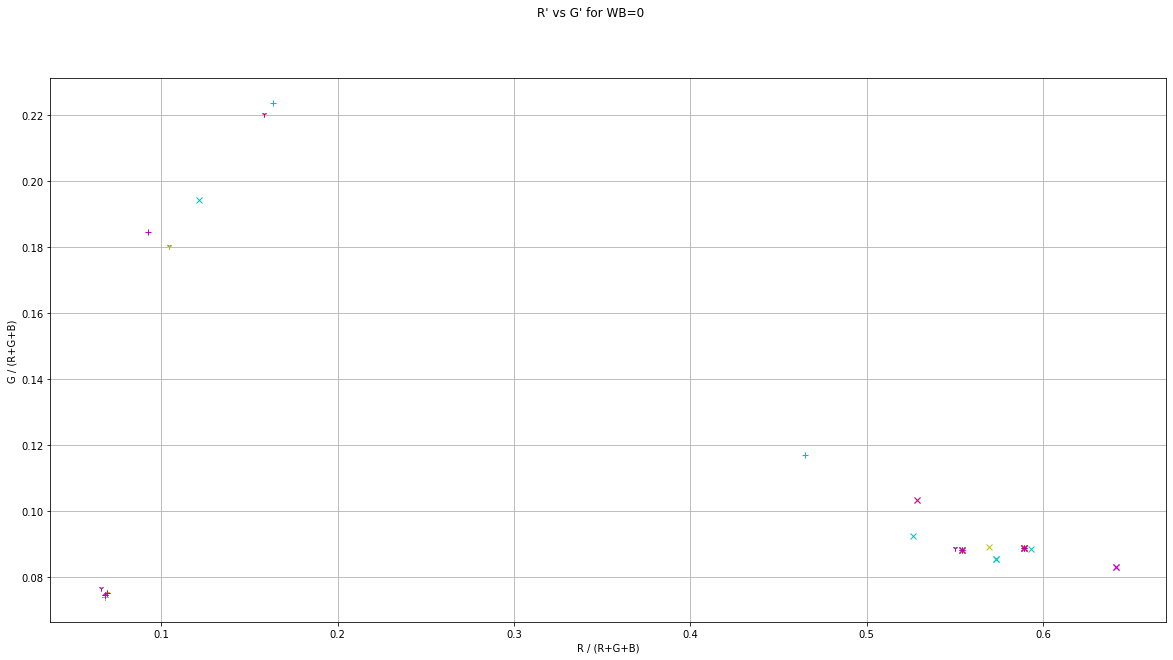

In [402]:
plt.plot([R for (G,R) in normalized_vals_red_wb0_ill1], [G for (G,R) in normalized_vals_red_wb0_ill1], 'rx', [R for (G,R) in normalized_vals_red_wb0_ill2], [G for (G,R) in normalized_vals_red_wb0_ill2], 'r+', [R for (G,R) in normalized_vals_red_wb0_ill3], [G for (G,R) in normalized_vals_red_wb0_ill3], 'r1',
         [R for (G,R) in normalized_vals_white_wb0_ill1], [G for (G,R) in normalized_vals_white_wb0_ill1], 'cx', [R for (G,R) in normalized_vals_white_wb0_ill2], [G for (G,R) in normalized_vals_white_wb0_ill2], 'c+', [R for (G,R) in normalized_vals_white_wb0_ill3], [G for (G,R) in normalized_vals_white_wb0_ill3], 'c1',
         [R for (G,R) in normalized_vals_yellow_wb0_ill1], [G for (G,R) in normalized_vals_yellow_wb0_ill1], 'yx', [R for (G,R) in normalized_vals_yellow_wb0_ill2], [G for (G,R) in normalized_vals_yellow_wb0_ill2], 'y+', [R for (G,R) in normalized_vals_yellow_wb0_ill3], [G for (G,R) in normalized_vals_yellow_wb0_ill3], 'y1',
         [R for (G,R) in normalized_vals_purple_wb0_ill1], [G for (G,R) in normalized_vals_purple_wb0_ill1], 'mx', [R for (G,R) in normalized_vals_purple_wb0_ill2], [G for (G,R) in normalized_vals_purple_wb0_ill2], 'm+', [R for (G,R) in normalized_vals_purple_wb0_ill3], [G for (G,R) in normalized_vals_purple_wb0_ill3], 'm1')
plt.xlabel('R / (R+G+B)')
plt.ylabel('G / (R+G+B)')
plt.suptitle('R\' vs G\' for WB=0')
plt.grid(True)
plt.show()

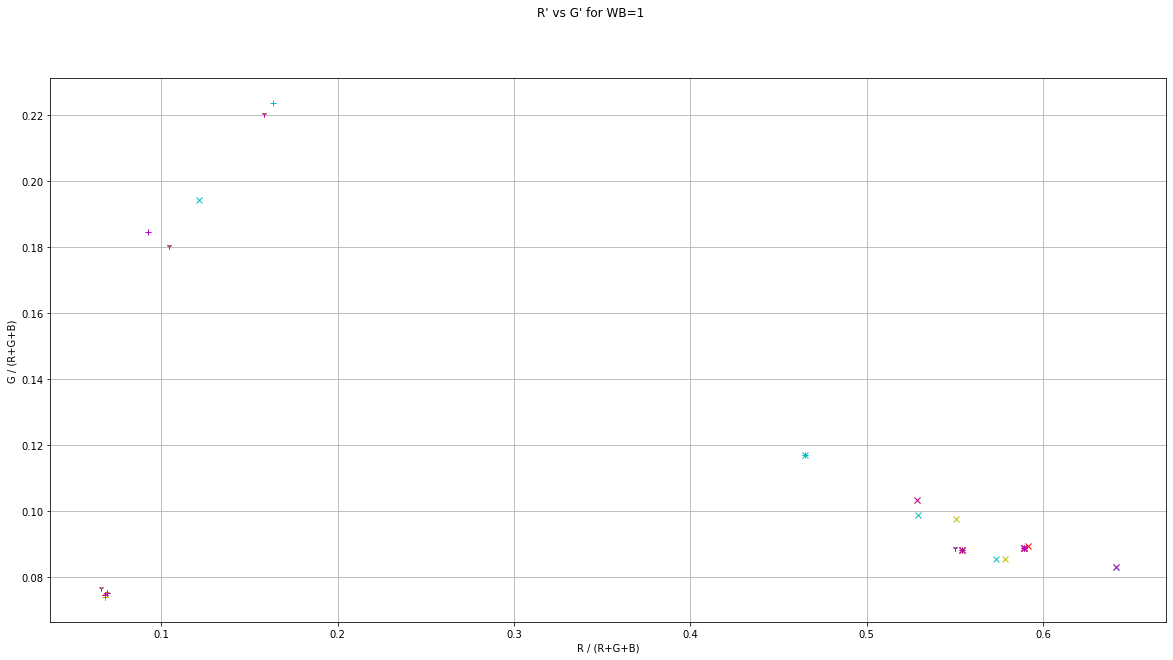

In [403]:
plt.plot([R for (G,R) in normalized_vals_red_wb1_ill1], [G for (G,R) in normalized_vals_red_wb1_ill1], 'rx', [R for (G,R) in normalized_vals_red_wb1_ill2], [G for (G,R) in normalized_vals_red_wb1_ill2], 'r+', [R for (G,R) in normalized_vals_red_wb1_ill3], [G for (G,R) in normalized_vals_red_wb1_ill3], 'r1',
         [R for (G,R) in normalized_vals_white_wb1_ill1], [G for (G,R) in normalized_vals_white_wb1_ill1], 'cx', [R for (G,R) in normalized_vals_white_wb1_ill2], [G for (G,R) in normalized_vals_white_wb1_ill2], 'c+', [R for (G,R) in normalized_vals_white_wb1_ill3], [G for (G,R) in normalized_vals_white_wb1_ill3], 'c1',
         [R for (G,R) in normalized_vals_yellow_wb1_ill1], [G for (G,R) in normalized_vals_yellow_wb1_ill1], 'yx', [R for (G,R) in normalized_vals_yellow_wb1_ill2], [G for (G,R) in normalized_vals_yellow_wb1_ill2], 'y+', [R for (G,R) in normalized_vals_yellow_wb1_ill3], [G for (G,R) in normalized_vals_yellow_wb1_ill3], 'y1',
         [R for (G,R) in normalized_vals_purple_wb1_ill1], [G for (G,R) in normalized_vals_purple_wb1_ill1], 'mx', [R for (G,R) in normalized_vals_purple_wb1_ill2], [G for (G,R) in normalized_vals_purple_wb1_ill2], 'm+', [R for (G,R) in normalized_vals_purple_wb1_ill3], [G for (G,R) in normalized_vals_purple_wb1_ill3], 'm1')
plt.xlabel('R / (R+G+B)')
plt.ylabel('G / (R+G+B)')
plt.suptitle('R\' vs G\' for WB=1')
plt.grid(True)
plt.show()

These two graphs are pretty similar, though there are a few differences?

# Part 4:

## Method 1: White Patch

## Calculations

In [0]:
B_1 = 0
G_1 = 0
R_1 = 0

B_2 = 0
G_2 = 0
R_2 = 0

B_3 = 0
G_3 = 0
R_3 = 0

for num in range(120):
  img_num = num // 4 # each image has 4 cropped sections
  if img_num % 2 == 0: # every other image has wb=0
    if num // 40 == 0: #illuminant 1
      if num % 4 == 0: #white
        B_1 += color_vectors[num][0]
        G_1 += color_vectors[num][1]
        R_1 += color_vectors[num][2]
    if num // 40 == 1: #illuminant 2
      if num % 4 == 0: #white
        B_2 += color_vectors[num][0]
        G_2 += color_vectors[num][1]
        R_2 += color_vectors[num][2]
    if num // 40 == 1: #illuminant 3
      if num % 4 == 0: #white
        B_3 += color_vectors[num][0]
        G_3 += color_vectors[num][1]
        R_3 += color_vectors[num][2]

B_1 /= 5
G_1 /= 5
R_1 /= 5
D_1_R = 1
D_1_G = R_1 / G_1
D_1_B = R_1 / B_1

B_2 /= 5
G_2 /= 5
R_2 /= 5
D_2_R = 1
D_2_G = R_2 / G_2
D_2_B = R_2 / B_2

B_3 /= 5
G_3 /= 5
R_3 /= 5
D_3_R = 1
D_3_G = R_3 / G_3
D_3_B = R_3 / B_3


In [0]:
white_patch_colors = []
for num in range(120):
  img_num = num // 4 # each image has 4 cropped sections
  if img_num % 2 == 0: # every other image has wb=0
    if num // 40 == 0: #illuminant 1
        B = color_vectors[num][0] * D_1_B
        G = color_vectors[num][1] * D_1_G
        R = color_vectors[num][2] * D_1_R
        white_patch_colors.append((B,G,R))
    if num // 40 == 1: #illuminant 2
        B = color_vectors[num][0] * D_2_B
        G = color_vectors[num][1] * D_2_G
        R = color_vectors[num][2] * D_2_R
        white_patch_colors.append((B,G,R))
    if num // 40 == 1: #illuminant 3
        B = color_vectors[num][0] * D_3_B
        G = color_vectors[num][1] * D_3_G
        R = color_vectors[num][2] * D_3_R
        white_patch_colors.append((B,G,R))


In [0]:
normalized_vals_yellow_wb0_ill1 = []
normalized_vals_purple_wb0_ill1 = []
normalized_vals_red_wb0_ill1 = []
normalized_vals_white_wb0_ill1 = []

normalized_vals_yellow_wb0_ill2 = []
normalized_vals_purple_wb0_ill2 = []
normalized_vals_red_wb0_ill2 = []
normalized_vals_white_wb0_ill2 = []

normalized_vals_yellow_wb0_ill3 = []
normalized_vals_purple_wb0_ill3 = []
normalized_vals_red_wb0_ill3 = []
normalized_vals_white_wb0_ill3 = []

for num in range(60):
  if num % 4 == 3: # yellow
    B,G,R = white_patch_colors[num]
    G_norm = G / (R+G+B)
    R_norm = R / (R+G+B)
    if num // 40 == 0: #illuminant 1
      normalized_vals_yellow_wb0_ill1.append((G_norm, R_norm))
    if num // 40 == 1: #illuminant 2
      normalized_vals_yellow_wb0_ill2.append((G_norm, R_norm))
    if num // 40 == 2: #illuminant 3
      normalized_vals_yellow_wb0_ill3.append((G_norm, R_norm))
  if num % 4 == 2: # purple
    B,G,R = white_patch_colors[num]
    G_norm = G / (R+G+B)
    R_norm = R / (R+G+B)
    if num // 40 == 0: #illuminant 1
      normalized_vals_purple_wb0_ill1.append((G_norm, R_norm))
    if num // 40 == 1: #illuminant 2
      normalized_vals_purple_wb0_ill2.append((G_norm, R_norm))
    if num // 40 == 2: #illuminant 3
      normalized_vals_purple_wb0_ill3.append((G_norm, R_norm))
  if num % 4 == 1: # red
    B,G,R = white_patch_colors[num]
    G_norm = G / (R+G+B)
    R_norm = R / (R+G+B)
    if num // 40 == 0: #illuminant 1
      normalized_vals_red_wb0_ill1.append((G_norm, R_norm))
    if num // 40 == 1: #illuminant 2
      normalized_vals_red_wb0_ill2.append((G_norm, R_norm))
    if num // 40 == 2: #illuminant 3
      normalized_vals_red_wb0_ill3.append((G_norm, R_norm))
  if num % 4 == 0: # white
    B,G,R = white_patch_colors[num]
    G_norm = G / (R+G+B)
    R_norm = R / (R+G+B)
    if num // 40 == 0: #illuminant 1
      normalized_vals_white_wb0_ill1.append((G_norm, R_norm))
    if num // 40 == 1: #illuminant 2
      normalized_vals_white_wb0_ill2.append((G_norm, R_norm))
    if num // 40 == 2: #illuminant 3
      normalized_vals_white_wb0_ill3.append((G_norm, R_norm))

## Graph

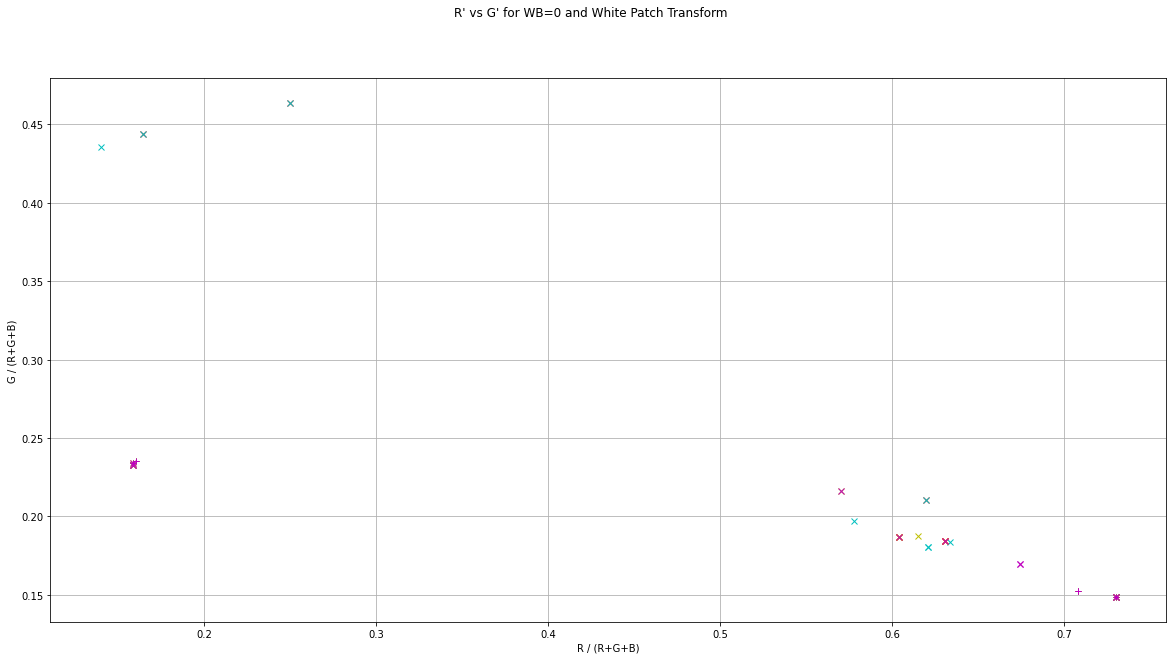

In [435]:
plt.plot([R for (G,R) in normalized_vals_red_wb0_ill1], [G for (G,R) in normalized_vals_red_wb0_ill1], 'rx', [R for (G,R) in normalized_vals_red_wb0_ill2], [G for (G,R) in normalized_vals_red_wb0_ill2], 'r+', [R for (G,R) in normalized_vals_red_wb0_ill3], [G for (G,R) in normalized_vals_red_wb0_ill3], 'r1',
         [R for (G,R) in normalized_vals_white_wb0_ill1], [G for (G,R) in normalized_vals_white_wb0_ill1], 'cx', [R for (G,R) in normalized_vals_white_wb0_ill2], [G for (G,R) in normalized_vals_white_wb0_ill2], 'c+', [R for (G,R) in normalized_vals_white_wb0_ill3], [G for (G,R) in normalized_vals_white_wb0_ill3], 'c1',
         [R for (G,R) in normalized_vals_yellow_wb0_ill1], [G for (G,R) in normalized_vals_yellow_wb0_ill1], 'yx', [R for (G,R) in normalized_vals_yellow_wb0_ill2], [G for (G,R) in normalized_vals_yellow_wb0_ill2], 'y+', [R for (G,R) in normalized_vals_yellow_wb0_ill3], [G for (G,R) in normalized_vals_yellow_wb0_ill3], 'y1',
         [R for (G,R) in normalized_vals_purple_wb0_ill1], [G for (G,R) in normalized_vals_purple_wb0_ill1], 'mx', [R for (G,R) in normalized_vals_purple_wb0_ill2], [G for (G,R) in normalized_vals_purple_wb0_ill2], 'm+', [R for (G,R) in normalized_vals_purple_wb0_ill3], [G for (G,R) in normalized_vals_purple_wb0_ill3], 'm1')
plt.xlabel('R / (R+G+B)')
plt.ylabel('G / (R+G+B)')
plt.suptitle('R\' vs G\' for WB=0 and White Patch Transform')
plt.grid(True)
plt.show()

x is illuminant 1\
\+ is illuminant2\
y is illuminant 3\
\
Red points represent red\
Cyan points represent white\
Yellow points represent yellow\
Magenta points represent purple

I'm not entirely sure what went wrong with these.

## Method 2: Grey World

## Calculations

In [0]:
B_1 = 0
G_1 = 0
R_1 = 0

B_2 = 0
G_2 = 0
R_2 = 0

B_3 = 0
G_3 = 0
R_3 = 0

for num in range(120):
  img_num = num // 4 # each image has 4 cropped sections
  if img_num % 2 == 0: # every other image has wb=0
    if num // 40 == 0: #illuminant 1
        B_1 += color_vectors[num][0]
        G_1 += color_vectors[num][1]
        R_1 += color_vectors[num][2]
    if num // 40 == 1: #illuminant 2
        B_2 += color_vectors[num][0]
        G_2 += color_vectors[num][1]
        R_2 += color_vectors[num][2]
    if num // 40 == 1: #illuminant 3
        B_3 += color_vectors[num][0]
        G_3 += color_vectors[num][1]
        R_3 += color_vectors[num][2]

B_1 /= 20
G_1 /= 20
R_1 /= 20
D_1_R = G_1 / R_1
D_1_G = 1
D_1_B = G_1 / B_1

B_2 /= 20
G_2 /= 20
R_2 /= 20
D_2_R = G_2 / R_2
D_2_G = 1
D_2_B = G_2 / B_2

B_3 /= 20
G_3 /= 20
R_3 /= 20
D_3_R = G_3 / R_3
D_3_G = 1
D_3_B = G_3 / B_3

In [0]:
grey_world_colors = []
for num in range(120):
  img_num = num // 4 # each image has 4 cropped sections
  if img_num % 2 == 0: # every other image has wb=0
    if num // 40 == 0: #illuminant 1
        B = color_vectors[num][0] * D_1_B
        G = color_vectors[num][1] * D_1_G
        R = color_vectors[num][2] * D_1_R
        grey_world_colors.append((B,G,R))
    if num // 40 == 1: #illuminant 2
        B = color_vectors[num][0] * D_2_B
        G = color_vectors[num][1] * D_2_G
        R = color_vectors[num][2] * D_2_R
        grey_world_colors.append((B,G,R))
    if num // 40 == 1: #illuminant 3
        B = color_vectors[num][0] * D_3_B
        G = color_vectors[num][1] * D_3_G
        R = color_vectors[num][2] * D_3_R
        grey_world_colors.append((B,G,R))

In [0]:
normalized_vals_yellow_wb0_ill1 = []
normalized_vals_purple_wb0_ill1 = []
normalized_vals_red_wb0_ill1 = []
normalized_vals_white_wb0_ill1 = []

normalized_vals_yellow_wb0_ill2 = []
normalized_vals_purple_wb0_ill2 = []
normalized_vals_red_wb0_ill2 = []
normalized_vals_white_wb0_ill2 = []

normalized_vals_yellow_wb0_ill3 = []
normalized_vals_purple_wb0_ill3 = []
normalized_vals_red_wb0_ill3 = []
normalized_vals_white_wb0_ill3 = []

for num in range(60):
  if num % 4 == 3: # yellow
    B,G,R = grey_world_colors[num]
    G_norm = G / (R+G+B)
    R_norm = R / (R+G+B)
    if num // 40 == 0: #illuminant 1
      normalized_vals_yellow_wb0_ill1.append((G_norm, R_norm))
    if num // 40 == 1: #illuminant 2
      normalized_vals_yellow_wb0_ill2.append((G_norm, R_norm))
    if num // 40 == 2: #illuminant 3
      normalized_vals_yellow_wb0_ill3.append((G_norm, R_norm))
  if num % 4 == 2: # purple
    B,G,R = grey_world_colors[num]
    G_norm = G / (R+G+B)
    R_norm = R / (R+G+B)
    if num // 40 == 0: #illuminant 1
      normalized_vals_purple_wb0_ill1.append((G_norm, R_norm))
    if num // 40 == 1: #illuminant 2
      normalized_vals_purple_wb0_ill2.append((G_norm, R_norm))
    if num // 40 == 2: #illuminant 3
      normalized_vals_purple_wb0_ill3.append((G_norm, R_norm))
  if num % 4 == 1: # red
    B,G,R = grey_world_colors[num]
    G_norm = G / (R+G+B)
    R_norm = R / (R+G+B)
    if num // 40 == 0: #illuminant 1
      normalized_vals_red_wb0_ill1.append((G_norm, R_norm))
    if num // 40 == 1: #illuminant 2
      normalized_vals_red_wb0_ill2.append((G_norm, R_norm))
    if num // 40 == 2: #illuminant 3
      normalized_vals_red_wb0_ill3.append((G_norm, R_norm))
  if num % 4 == 0: # white
    B,G,R = grey_world_colors[num]
    G_norm = G / (R+G+B)
    R_norm = R / (R+G+B)
    if num // 40 == 0: #illuminant 1
      normalized_vals_white_wb0_ill1.append((G_norm, R_norm))
    if num // 40 == 1: #illuminant 2
      normalized_vals_white_wb0_ill2.append((G_norm, R_norm))
    if num // 40 == 2: #illuminant 3
      normalized_vals_white_wb0_ill3.append((G_norm, R_norm))

## Graph

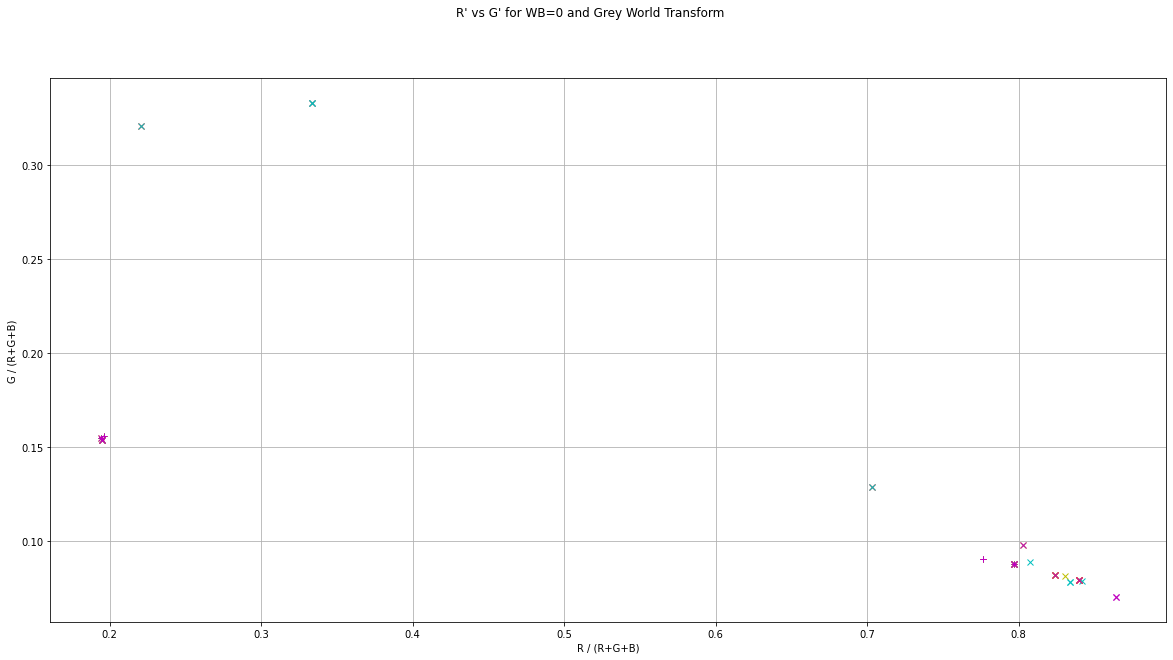

In [447]:
plt.plot([R for (G,R) in normalized_vals_red_wb0_ill1], [G for (G,R) in normalized_vals_red_wb0_ill1], 'rx', [R for (G,R) in normalized_vals_red_wb0_ill2], [G for (G,R) in normalized_vals_red_wb0_ill2], 'r+', [R for (G,R) in normalized_vals_red_wb0_ill3], [G for (G,R) in normalized_vals_red_wb0_ill3], 'r1',
         [R for (G,R) in normalized_vals_white_wb0_ill1], [G for (G,R) in normalized_vals_white_wb0_ill1], 'cx', [R for (G,R) in normalized_vals_white_wb0_ill2], [G for (G,R) in normalized_vals_white_wb0_ill2], 'c+', [R for (G,R) in normalized_vals_white_wb0_ill3], [G for (G,R) in normalized_vals_white_wb0_ill3], 'c1',
         [R for (G,R) in normalized_vals_yellow_wb0_ill1], [G for (G,R) in normalized_vals_yellow_wb0_ill1], 'yx', [R for (G,R) in normalized_vals_yellow_wb0_ill2], [G for (G,R) in normalized_vals_yellow_wb0_ill2], 'y+', [R for (G,R) in normalized_vals_yellow_wb0_ill3], [G for (G,R) in normalized_vals_yellow_wb0_ill3], 'y1',
         [R for (G,R) in normalized_vals_purple_wb0_ill1], [G for (G,R) in normalized_vals_purple_wb0_ill1], 'mx', [R for (G,R) in normalized_vals_purple_wb0_ill2], [G for (G,R) in normalized_vals_purple_wb0_ill2], 'm+', [R for (G,R) in normalized_vals_purple_wb0_ill3], [G for (G,R) in normalized_vals_purple_wb0_ill3], 'm1')
plt.xlabel('R / (R+G+B)')
plt.ylabel('G / (R+G+B)')
plt.suptitle('R\' vs G\' for WB=0 and Grey World Transform')
plt.grid(True)
plt.show()

x is illuminant 1\
\+ is illuminant2\
y is illuminant 3\
\
Red points represent red\
Cyan points represent white\
Yellow points represent yellow\
Magenta points represent purple\
\
Even with pretty different matrices, I get similarly shaped graphs (though the values are different).

## Method 3: White World

## Calculations

In [0]:
B_1 = 0
G_1 = 0
R_1 = 0

B_2 = 0
G_2 = 0
R_2 = 0

B_3 = 0
G_3 = 0
R_3 = 0

for num in range(120):
  img_num = num // 4 # each image has 4 cropped sections
  if img_num % 2 == 0: # every other image has wb=0
    if num // 40 == 0: #illuminant 1
      if (R_1+B_1+G_1) < (color_vectors[num][0] + color_vectors[num][1] + color_vectors[num][2]):
        B_1 = color_vectors[num][0]
        G_1 = color_vectors[num][1]
        R_1 = color_vectors[num][2]
    if num // 40 == 1: #illuminant 2
      if (R_2+B_2+G_2) < (color_vectors[num][0] + color_vectors[num][1] + color_vectors[num][2]):
        B_2 = color_vectors[num][0]
        G_2 = color_vectors[num][1]
        R_2 = color_vectors[num][2]
    if num // 40 == 1: #illuminant 3
      if (R_3+B_3+G_3) < (color_vectors[num][0] + color_vectors[num][1] + color_vectors[num][2]):
        B_3 = color_vectors[num][0]
        G_3 = color_vectors[num][1]
        R_3 = color_vectors[num][2]


D_1_R = B_1 / R_1
D_1_G = B_1 / G_1
D_1_B = 1


D_2_R = B_2 / R_2
D_2_G = B_2 / G_2
D_2_B = 1


D_3_R = B_3 / R_3
D_3_G = B_3 / G_3
D_3_B = 1

In [0]:
white_world_colors = []
for num in range(120):
  img_num = num // 4 # each image has 4 cropped sections
  if img_num % 2 == 0: # every other image has wb=0
    if num // 40 == 0: #illuminant 1
        B = color_vectors[num][0] * D_1_B
        G = color_vectors[num][1] * D_1_G
        R = color_vectors[num][2] * D_1_R
        white_world_colors.append((B,G,R))
    if num // 40 == 1: #illuminant 2
        B = color_vectors[num][0] * D_2_B
        G = color_vectors[num][1] * D_2_G
        R = color_vectors[num][2] * D_2_R
        white_world_colors.append((B,G,R))
    if num // 40 == 1: #illuminant 3
        B = color_vectors[num][0] * D_3_B
        G = color_vectors[num][1] * D_3_G
        R = color_vectors[num][2] * D_3_R
        white_world_colors.append((B,G,R))

In [0]:
normalized_vals_yellow_wb0_ill1 = []
normalized_vals_purple_wb0_ill1 = []
normalized_vals_red_wb0_ill1 = []
normalized_vals_white_wb0_ill1 = []

normalized_vals_yellow_wb0_ill2 = []
normalized_vals_purple_wb0_ill2 = []
normalized_vals_red_wb0_ill2 = []
normalized_vals_white_wb0_ill2 = []

normalized_vals_yellow_wb0_ill3 = []
normalized_vals_purple_wb0_ill3 = []
normalized_vals_red_wb0_ill3 = []
normalized_vals_white_wb0_ill3 = []

for num in range(60):
  if num % 4 == 3: # yellow
    B,G,R = white_world_colors[num]
    G_norm = G / (R+G+B)
    R_norm = R / (R+G+B)
    if num // 40 == 0: #illuminant 1
      normalized_vals_yellow_wb0_ill1.append((G_norm, R_norm))
    if num // 40 == 1: #illuminant 2
      normalized_vals_yellow_wb0_ill2.append((G_norm, R_norm))
    if num // 40 == 2: #illuminant 3
      normalized_vals_yellow_wb0_ill3.append((G_norm, R_norm))
  if num % 4 == 2: # purple
    B,G,R = white_world_colors[num]
    G_norm = G / (R+G+B)
    R_norm = R / (R+G+B)
    if num // 40 == 0: #illuminant 1
      normalized_vals_purple_wb0_ill1.append((G_norm, R_norm))
    if num // 40 == 1: #illuminant 2
      normalized_vals_purple_wb0_ill2.append((G_norm, R_norm))
    if num // 40 == 2: #illuminant 3
      normalized_vals_purple_wb0_ill3.append((G_norm, R_norm))
  if num % 4 == 1: # red
    B,G,R = white_world_colors[num]
    G_norm = G / (R+G+B)
    R_norm = R / (R+G+B)
    if num // 40 == 0: #illuminant 1
      normalized_vals_red_wb0_ill1.append((G_norm, R_norm))
    if num // 40 == 1: #illuminant 2
      normalized_vals_red_wb0_ill2.append((G_norm, R_norm))
    if num // 40 == 2: #illuminant 3
      normalized_vals_red_wb0_ill3.append((G_norm, R_norm))
  if num % 4 == 0: # white
    B,G,R = white_world_colors[num]
    G_norm = G / (R+G+B)
    R_norm = R / (R+G+B)
    if num // 40 == 0: #illuminant 1
      normalized_vals_white_wb0_ill1.append((G_norm, R_norm))
    if num // 40 == 1: #illuminant 2
      normalized_vals_white_wb0_ill2.append((G_norm, R_norm))
    if num // 40 == 2: #illuminant 3
      normalized_vals_white_wb0_ill3.append((G_norm, R_norm))

## Graph

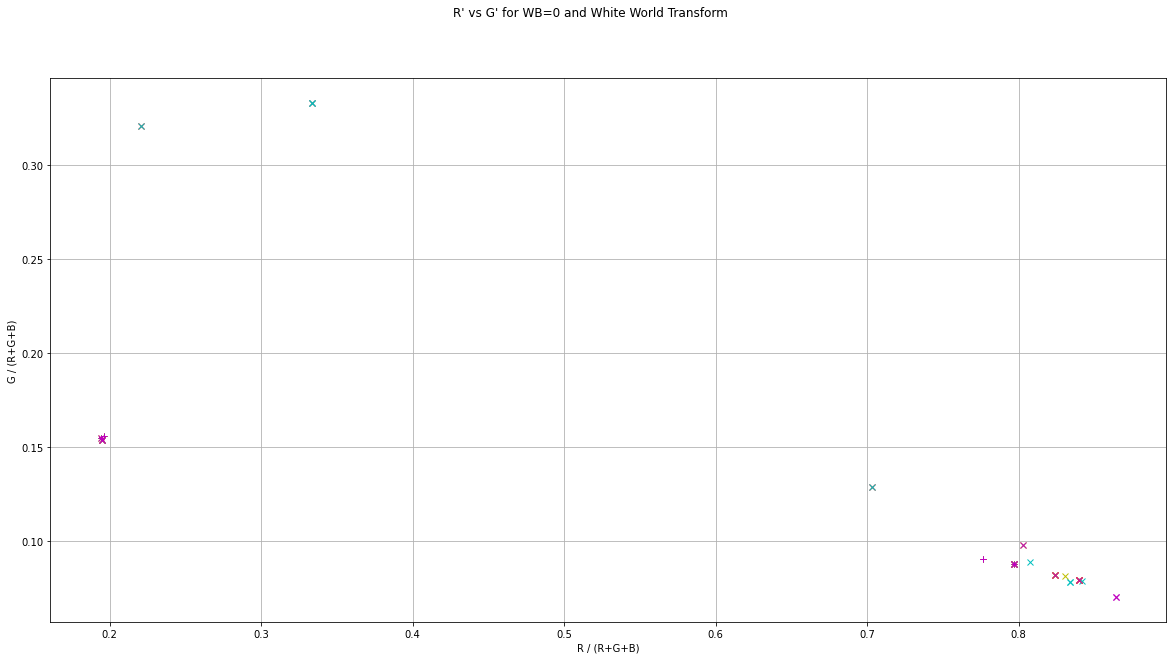

In [446]:
plt.plot([R for (G,R) in normalized_vals_red_wb0_ill1], [G for (G,R) in normalized_vals_red_wb0_ill1], 'rx', [R for (G,R) in normalized_vals_red_wb0_ill2], [G for (G,R) in normalized_vals_red_wb0_ill2], 'r+', [R for (G,R) in normalized_vals_red_wb0_ill3], [G for (G,R) in normalized_vals_red_wb0_ill3], 'r1',
         [R for (G,R) in normalized_vals_white_wb0_ill1], [G for (G,R) in normalized_vals_white_wb0_ill1], 'cx', [R for (G,R) in normalized_vals_white_wb0_ill2], [G for (G,R) in normalized_vals_white_wb0_ill2], 'c+', [R for (G,R) in normalized_vals_white_wb0_ill3], [G for (G,R) in normalized_vals_white_wb0_ill3], 'c1',
         [R for (G,R) in normalized_vals_yellow_wb0_ill1], [G for (G,R) in normalized_vals_yellow_wb0_ill1], 'yx', [R for (G,R) in normalized_vals_yellow_wb0_ill2], [G for (G,R) in normalized_vals_yellow_wb0_ill2], 'y+', [R for (G,R) in normalized_vals_yellow_wb0_ill3], [G for (G,R) in normalized_vals_yellow_wb0_ill3], 'y1',
         [R for (G,R) in normalized_vals_purple_wb0_ill1], [G for (G,R) in normalized_vals_purple_wb0_ill1], 'mx', [R for (G,R) in normalized_vals_purple_wb0_ill2], [G for (G,R) in normalized_vals_purple_wb0_ill2], 'm+', [R for (G,R) in normalized_vals_purple_wb0_ill3], [G for (G,R) in normalized_vals_purple_wb0_ill3], 'm1')
plt.xlabel('R / (R+G+B)')
plt.ylabel('G / (R+G+B)')
plt.suptitle('R\' vs G\' for WB=0 and White World Transform')
plt.grid(True)
plt.show()

x is illuminant 1\
\+ is illuminant2\
y is illuminant 3\
\
Red points represent red\
Cyan points represent white\
Yellow points represent yellow\
Magenta points represent purple